In [2]:
import plotly.graph_objects as go
import pandas as pd 


In [3]:
input_cvs_file = "../Output/SummaryReports/" + "Summary02-Quarterly-Results-20240817-155741.csv"

df = pd.read_csv(input_cvs_file)

df.head(5)

,Quarterly Results,Stockname,Mar 2021,Jun 2021,Sep 2021,Dec 2021,Mar 2022,Jun 2022,Sep 2022,Dec 2022,Mar 2023,Jun 2023,Sep 2023,Dec 2023,Mar 2024,Jun 2024
0,Sales,526433,NaN,41.64,47.70,47.62,54.71,50.92,63.42,54.14,51.94,50.95,50.39,55.72,44.59,52.62
1,Expenses,526433,NaN,36.70,39.98,42.30,51.69,45.54,57.43,48.94,49.74,48.58,48.46,55.37,45.53,48.43
2,Operating Profit,526433,NaN,4.94,7.72,5.32,3.02,5.38,5.99,5.20,2.20,2.37,1.93,0.35,-0.94,4.19
3,OPM %,526433,NaN,11.86%,16.18%,11.17%,5.52%,10.57%,9.44%,9.60%,4.24%,4.65%,3.83%,0.63%,-2.11%,7.96%
4,Other Income,526433,NaN,0.50,0.35,3.89,2.19,2.43,1.58,2.74,1.55,1.98,0.42,1.14,3.31,3.20


In [4]:
df['Quarterly Results'] = df['Quarterly Results'].str.replace('Revenue', 'Sales')

In [5]:
df_sales      = df.loc[(df['Quarterly Results'] == 'Sales')]
df_pbt        = df.loc[(df['Quarterly Results'] == 'Profit before tax' )]
df_net_profit = df.loc[(df['Quarterly Results'] == 'Net Profit')]
df_eps        = df.loc[(df['Quarterly Results'] == 'EPS in Rs')]

In [6]:
df_sales.head(6)

,Quarterly Results,Stockname,Mar 2021,Jun 2021,Sep 2021,Dec 2021,Mar 2022,Jun 2022,Sep 2022,Dec 2022,Mar 2023,Jun 2023,Sep 2023,Dec 2023,Mar 2024,Jun 2024
0,Sales,526433,NaN,41.64,47.70,47.62,54.71,50.92,63.42,54.14,51.94,50.95,50.39,55.72,44.59,52.62
12,Sales,532407,NaN,33.92,38.02,38.29,37.41,41.67,49.15,53.70,53.83,57.01,71.85,89.63,75.42,80.35
24,Sales,544021,NaN,NaN,NaN,NaN,NaN,157,178,176,232,220,236,204,222,197
36,Sales,AARTIDRUGS,NaN,580,580,635,694,622,688,664,742,661,642,606,620,555
48,Sales,AARTIIND,NaN,1317,1256,2076,1756,1610,1685,1668,1656,1414,1454,1732,1773,1855
60,Sales,AARTIPHARM,NaN,NaN,NaN,NaN,460,457,531,472,485,458,440,449,506,555


In [10]:
date = '1970-01-01'
df_sales = df_sales.sort_index(
    axis=1, 
    key=lambda x: pd.to_datetime(x, errors='coerce', format='mixed').fillna(date)
)
df_pbt = df_pbt.sort_index(
    axis=1, 
    key=lambda x: pd.to_datetime(x, errors='coerce', format='mixed').fillna(date)
)
df_net_profit = df_net_profit.sort_index(
    axis=1, 
    key=lambda x: pd.to_datetime(x, errors='coerce', format='mixed').fillna(date)
)
df_eps = df_eps.sort_index(
    axis=1, 
    key=lambda x: pd.to_datetime(x, errors='coerce', format='mixed').fillna(date)
)

In [ ]:
df_eps = df_eps.drop('Quarterly Results', axis=1)
df_eps = df_eps.rename(columns={'Stockname':'Quarter'})
df_eps.head(5)

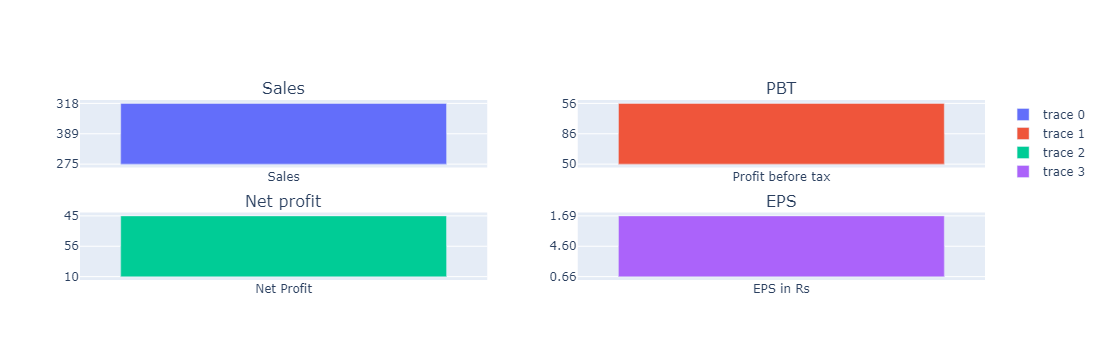

In [9]:
from plotly.subplots import make_subplots
# plotly setup
fig = go.Figure()

#fig = make_subplots(rows=2, cols=2) 

fig = make_subplots(
        rows=2,
        cols=2,
        specs=[
            [{"type": "bar"}, {"type": "bar"}],
            [{"type": "bar"}, {"type": "bar"}],
        ],
       subplot_titles=('Sales',  'PBT', 'Net profit', 'EPS')
    )

fig.add_trace(
    go.Bar(x=df_sales['Quarterly Results'], y=df_sales[df.columns[2]]),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=df_pbt['Quarterly Results'], y=df_pbt[df.columns[2]]),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x=df_net_profit['Quarterly Results'], y=df_net_profit[df.columns[2]]),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x=df_eps['Quarterly Results'], y=df_eps[df.columns[2]]),
    row=2, col=2
)




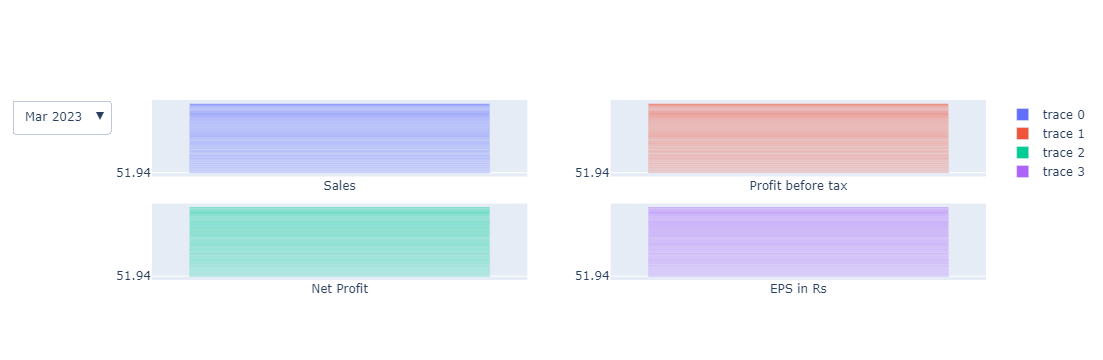

In [8]:
buttons = [
            {
             'method': 'update', 
             'label': col, 
             'args': [ {'y': [df_sales[col]]} ]
            } 
            for col in df_sales.iloc[:, 2:]
          ]

# add menus
updatemenus = [
               {'buttons': buttons,
                'direction': 'down',
                'showactive': True,
               }
              ]


# update layout with buttons, and show the figure
fig.update_layout(updatemenus=updatemenus)

fig.show()
